In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import ast  # To safely evaluate the string representation of tuples

In [2]:
csv_file_path = r"./../output/data/csv/sample/status_counts_per_month_year.csv"
df = pd.read_csv(csv_file_path)

In [ ]:
df['transition'] = df.Status_2_Count + df.Status_3_Count

In [12]:
df.head(12)

,Year,Month,Status_0_Count,Status_1_Count,Status_2_Count,Status_3_Count,transition
0,1979,1,453078,12252,12218,9555,21773
1,1979,2,423808,4724,7465,3967,11432
2,1979,3,393090,18416,67410,8187,75597
3,1979,4,263884,69950,130908,6648,137556
4,1979,5,113543,255048,112829,5683,118512
5,1979,6,39050,383152,45120,4068,49188
6,1979,7,3749,459759,18491,5104,23595
7,1979,8,21495,423752,33268,8588,41856
8,1979,9,49675,365803,47940,7972,55912
9,1979,10,93515,298494,85283,9811,95094


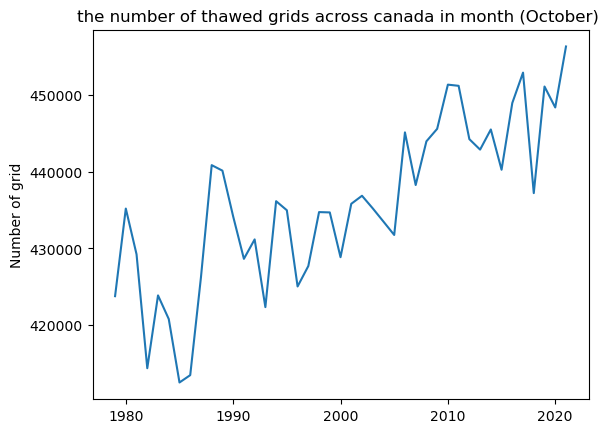

In [47]:
month = df[df.Month == 8] 

# plt.plot(month.Year, month.Status_0_Count)
plt.plot(month.Year, month.Status_1_Count)
# plt.plot(month.Year, month.transition)
plt.ylabel('Number of grid')
plt.title('the number of thawed grids across canada in month (October) ')
plt.show()

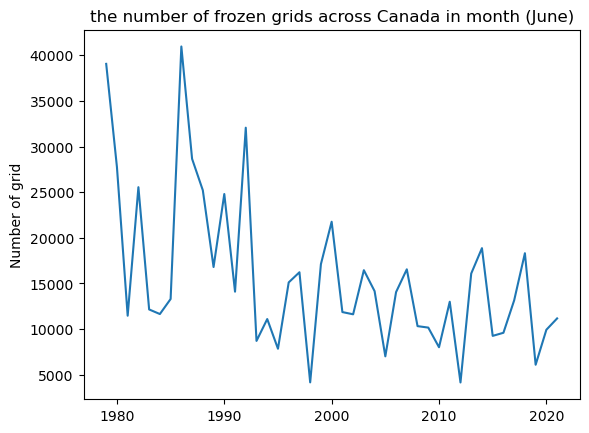

In [68]:
month = df[df.Month == 6] 

plt.plot(month.Year, month.Status_0_Count)

plt.ylabel('Number of grid')
plt.title('the number of frozen grids across Canada in month (June)')
plt.show()

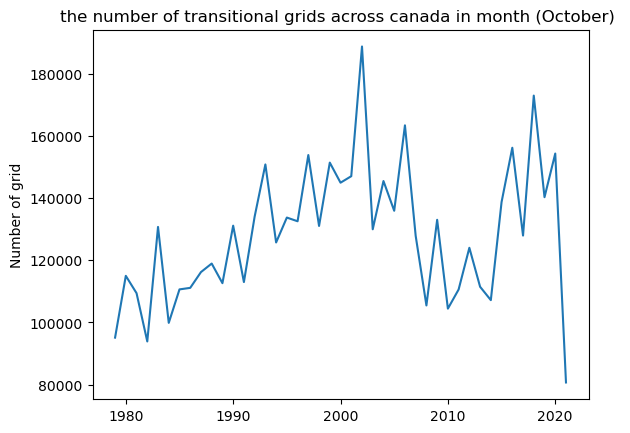

In [60]:
month = df[df.Month == 10] 

# plt.plot(month.Year, month.Status_0_Count)
plt.plot(month.Year, month.transition)
# plt.plot(month.Year, month.transition)
plt.ylabel('Number of grid')
plt.title('the number of transitional grids across canada in month (October) ')
plt.show()

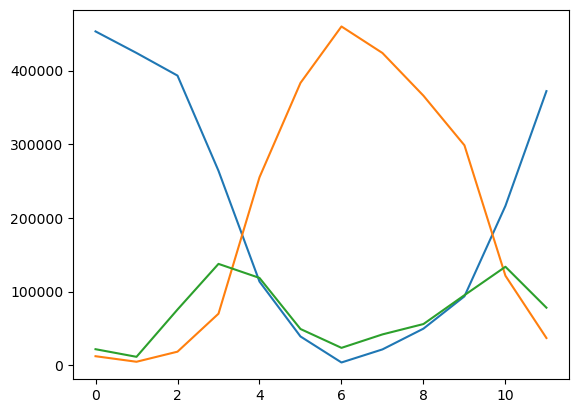

In [17]:
plt.plot(df.iloc[:12,:].index, df.iloc[:12,:].Status_0_Count)
plt.plot(df.iloc[:12,:].index, df.iloc[:12,:].Status_1_Count)
plt.plot(df.iloc[:12,:].index, df.iloc[:12,:].transition)

plt.show()

In [ ]:
############################F/T status indicated as follows:###########################

#################### AM, PM
# 0 = frozen
# 1 = thawed

#################### CO
# 0 = AM/PM frozen
# 1 = AM/PM thawed
# 2 = AM frozen, PM thawed (transitional)
# 3 = AM thawed, PM frozen (inverse transitional)

############## Additional Values
# 252 = no data
# 253 = non-cold constraint area
# 254 = 100% open water
# 255 = fill

In [89]:
# Values to exclude
values_to_exclude = [252, 253, 254, 255]

# Select rows where 'ft_status' is not in the list of values to exclude
filtered_df = df[~df['ft_status'].isin(values_to_exclude)]

In [7]:
# Creating a composite month-year column for clearer grouping (optional)
df['month_year'] = df['datetime'].dt.to_period('M')

# Step 3: Use pd.crosstab to count occurrences of each status value for each month-year
status_counts_per_month_year = pd.crosstab(index=df['month_year'], columns=df['ft_status'])

# Optional: Filter columns in the crosstab to only include status values of 0, 1, 2, and 3
status_counts_per_month_year = status_counts_per_month_year[[0,1,2,3]]

# status_counts_per_month_year now has the count of each status value (0, 1, 2, 3) for each month-year combination


In [8]:
status_counts_per_month_year

ft_status,0,1,2,3
month_year,,,,
1979-01,453078,12252,12218,9555
1979-02,423808,4724,7465,3967
1979-03,393090,18416,67410,8187
1979-04,263884,69950,130908,6648
1979-05,113543,255048,112829,5683
1979-06,39050,383152,45120,4068
1979-07,3749,459759,18491,5104
1979-08,21495,423752,33268,8588
1979-09,49675,365803,47940,7972


In [118]:
status_counts_per_month_year['transition'] = status_counts_per_month_year[2] + status_counts_per_month_year[3]
date_index = status_counts_per_month_year.index.to_timestamp()

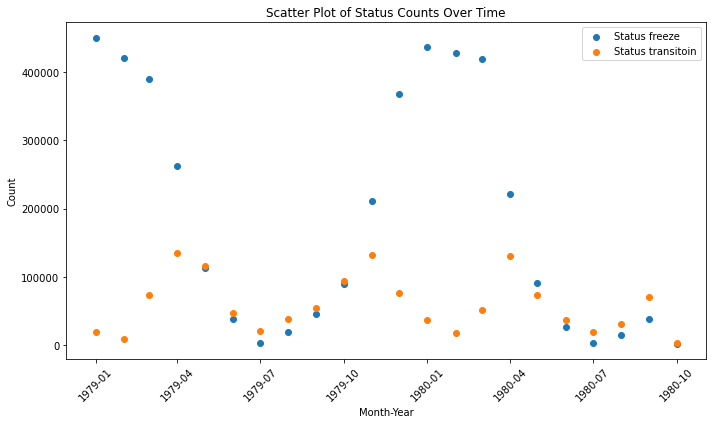

In [120]:
plt.figure(figsize=(10, 6))  # Create a new figure for each plot
# Use date_index for the x-axis and the status column for the y-axis
plt.scatter(date_index, status_counts_per_month_year[0], label='Status freeze')
plt.scatter(date_index, status_counts_per_month_year['transition'], label='Status transitoin')

plt.title('Scatter Plot of Status Counts Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.legend()
# Formatting the x-axis labels to show them as dates and rotate for better readability
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust subplot params
plt.show()

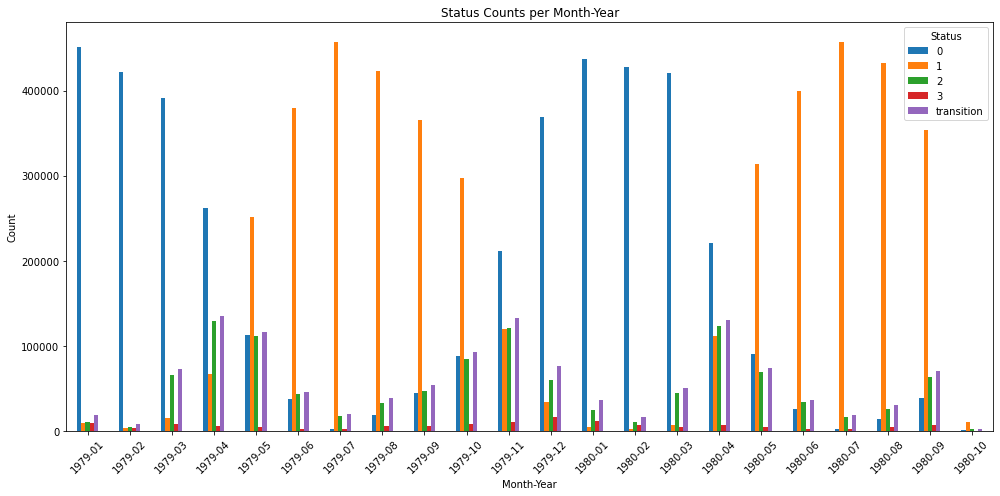

In [117]:
import matplotlib.pyplot as plt

# Assuming status_counts_per_month_year is your DataFrame from the previous steps
# It contains counts of each status (0, 1, 2, 3) for each month-year combination

# Plotting the DataFrame
status_counts_per_month_year.plot(kind='bar', figsize=(14, 7))
plt.title('Status Counts per Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Status')
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area

# Show the plot
plt.show()
